In [2]:
import pandas as pd
data = pd.read_csv("data/file.csv", encoding='latin-1')

In [3]:
datas = data[data["Unit_x"] == "tonnes"]
datas = datas.drop("Domain", axis= 1)
datas = datas[datas["Item_x"] == "Rice"]
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item_x", axis=1)
datas = datas[datas["Item_y"] == "Pesticides (total)"]
datas = datas.drop("Item_y", axis=1)
datas = datas.drop("Element_y", axis=1)
datas = datas.drop("Element_x", axis=1)
datas = datas.drop("Unit_x", axis=1)


In [4]:
datas.dtypes

Year                  int64
Area                 object
avg_temp            float64
yield_amound        float64
pesticide_amound    float64
dtype: object

In [5]:
datas

,Year,Area,avg_temp,yield_amound,pesticide_amound
896,1990,Ghana,26.73,80900.0,65.80
2296,1991,Ghana,26.60,150900.0,65.80
3696,1992,Ghana,26.47,131500.0,65.80
5096,1993,Ghana,26.67,157400.0,65.80
6496,1994,Ghana,26.62,162300.0,65.80
...,...,...,...,...,...
15620795,2009,Albania,16.73,0.0,410.55
15622226,2010,Albania,16.52,0.0,590.50
15623657,2011,Albania,16.45,0.0,582.68
15625088,2012,Albania,16.70,0.0,361.62


In [6]:
from sklearn.preprocessing import OneHotEncoder
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)


Linear Regression

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
# Extract features (X) 
# target variable (y)
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 55470910807040.9


In [8]:
import seaborn as sns

<Axes: xlabel='yield_amound'>

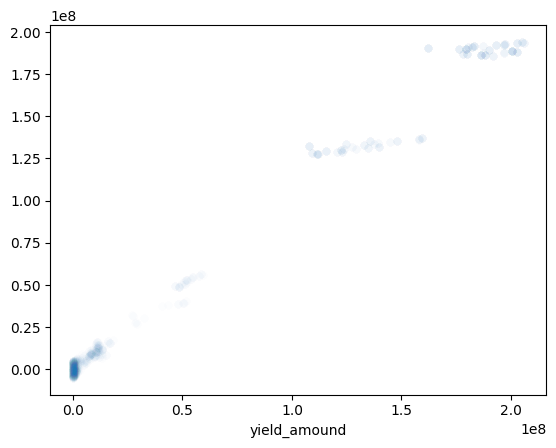

In [9]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

<Axes: xlabel='yield_amound', ylabel='Count'>

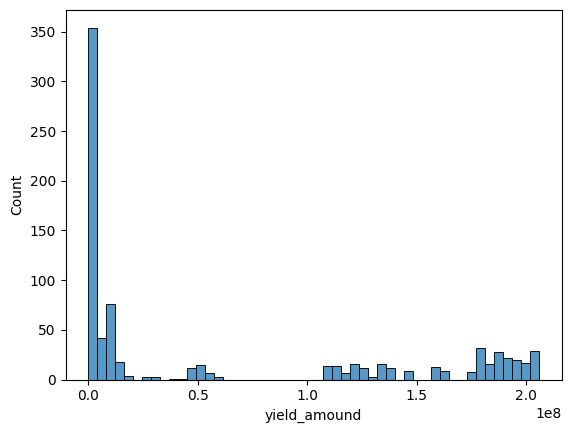

In [10]:
sns.histplot( data= y_test, bins=50)

<Axes: ylabel='Count'>

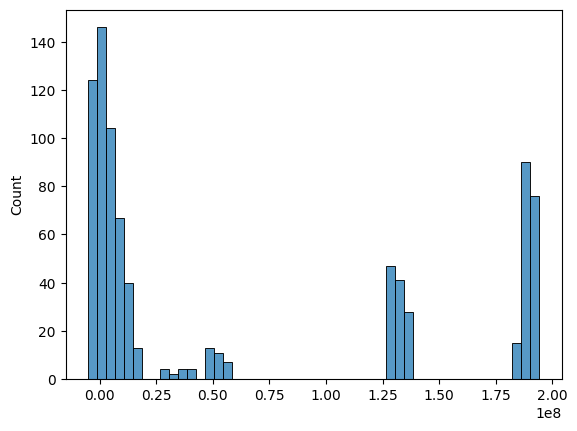

In [11]:
sns.histplot( data= y_pred, bins=50)

Lasso

In [12]:
from sklearn.linear_model import Lasso

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso(alpha=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 55465742663540.0


<Axes: xlabel='yield_amound'>

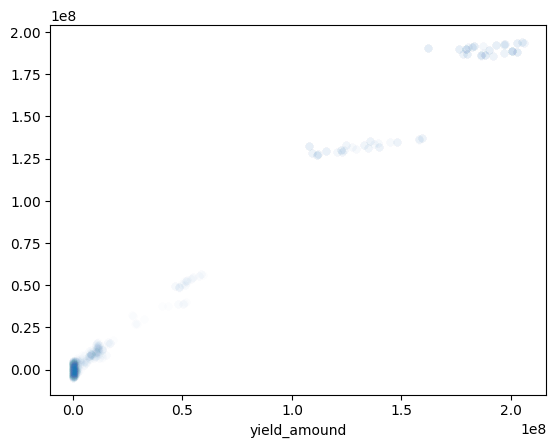

In [13]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

Gradiant Boosting Regressor 

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 8814904270609.672


<Axes: xlabel='yield_amound'>

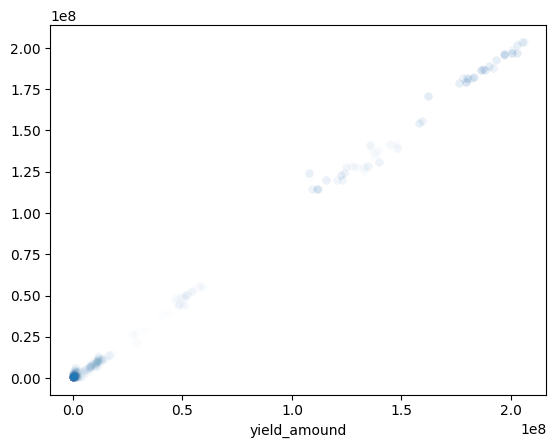

In [15]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

Random forest regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 83686392999.07808


<Axes: xlabel='yield_amound'>

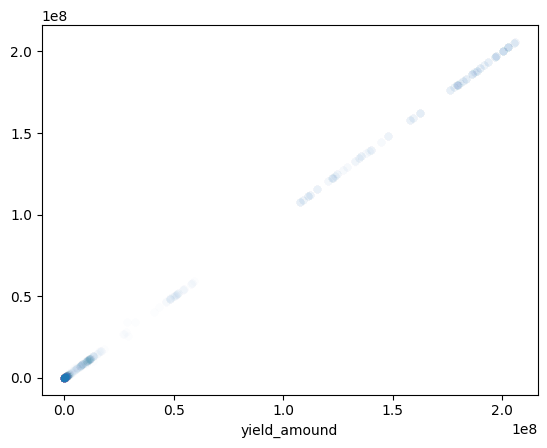

In [17]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

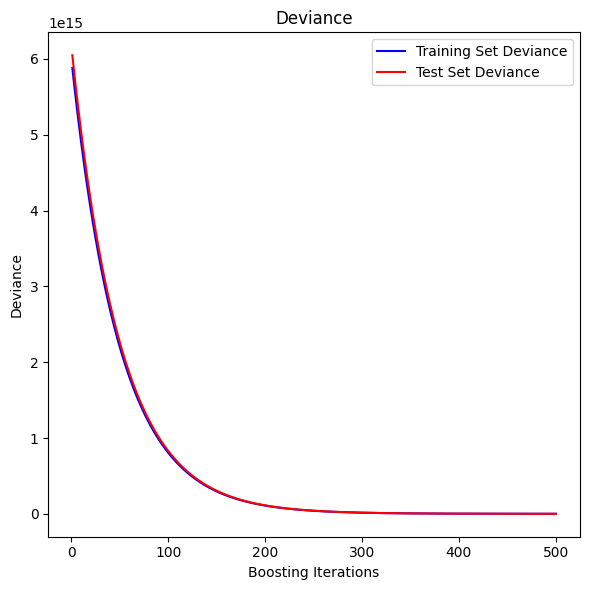

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))

est = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.1, max_depth=5, random_state=0,
    loss='squared_error'
).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


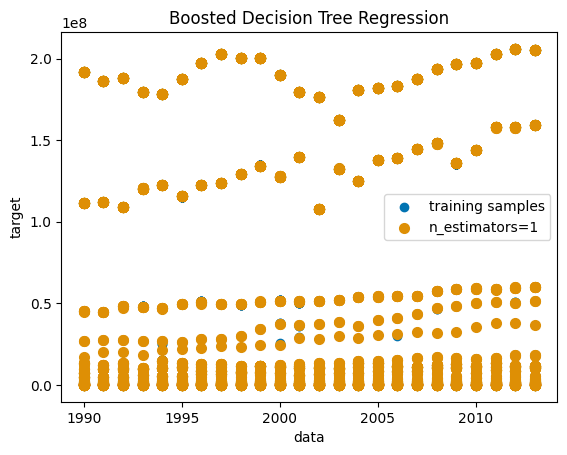

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred =  est.predict(X)
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X["Year"], y, color=colors[0], label="training samples")
plt.scatter(X["Year"], y_pred, color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(datas.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(datas.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()